# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 5: *AreaMotion*
Compute optical flow by using correlation
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, plotImageL, createImageF
from PlotUtilities import plotQuiver

# Math and iteration
from math import sqrt, atan2, sin, cos
from timeit import itertools

### Parameters:
    imageName = Input image name
    kernelSize = Size of the kernel 
    maxDisp = Maximum size of displacement 
    step = Delta that defines the image sample positions to obtain optical flow

In [2]:
image1Name = "Rino0.png"
image2Name = "Rino1.png"
kernelSize = 11
maxDisp = 10
step = 10

### Read and show images

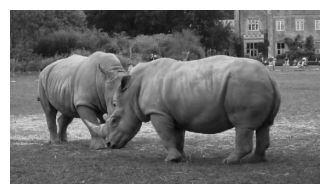

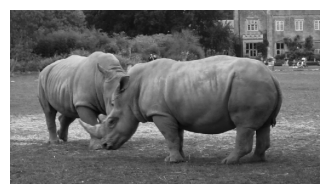

In [3]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter5/Input/")

inputImage1, width, height = imageReadL(pathToDir + image1Name)
inputImage2, _, _  = imageReadL(pathToDir + image2Name)

plotImageL(inputImage1, figureSize = 4)
plotImageL(inputImage2, figureSize = 4)

### Compute optical flow

In [4]:
kernelCentre = int((kernelSize - 1) / 2)

# Compute Motion in sampled points
motionMagnitude = createImageF(width, height)
motionDirection = createImageF(width, height)
motionWeight = createImageF(width, height)
for x,y in itertools.product(range(2 * step, width-2*step, step),                 \
                             range(2 * step, height-2*step,step)):
    
    minDiference, nextDiference = float("inf"),  float("inf")
    mDisp = [0,0]
    for dx,dy in itertools.product(range(-maxDisp, maxDisp),                      \
                                   range(-maxDisp, maxDisp)):
        if dx != 0 or dy != 0:
            differenceMatching = 0
            for wx,wy in itertools.product(range(0, kernelSize),                  \
                                           range(0, kernelSize)):
                y1, x1 = y + wy - kernelCentre, x + wx - kernelCentre 
                y2, x2 = y1 + dy, x1 + dx
                if y1 > -1 and y1 <  height and  x1 > -1 and x1 <  width and      \
                   y2 > -1 and y2 <  height and  x2 > -1 and x2 <  width:
                    differenceMatching += abs(float(inputImage1[y1,x1]) -         \
                                              float(inputImage2[y2,x2]))
            # Keep the most similar 
            if differenceMatching < minDiference:
                nextDiference = minDiference
                minDiference = differenceMatching
                mDisp = [dy,dx]
            else:
                if differenceMatching < nextDiference:
                    nextDiference = differenceMatching

    # Set motion only if we find a good match
    if minDiference != nextDiference:            
        motionMagnitude[y,x] = sqrt(mDisp[0]*mDisp[0]+mDisp[1]*mDisp[1])
        motionDirection[y,x] = atan2(mDisp[0],-mDisp[1]) 
        motionWeight[y,x] = nextDiference - minDiference     
   
# Weighted average
motionMagnitudeW = createImageF(width, height)
motionDirectionW = createImageF(width, height)         
for x,y in itertools.product(range(2 * step, width-2*step, step),                   \
                             range(2 * step, height-2*step,step)):
    weightedX, weightedY = 0.0, 0.0
    totalWeight = 0.0
    for wx,wy in itertools.product(range(-1, 2), range(-1, 2)):
        w = motionWeight[y + wy*step, x + wx*step]
        m = motionMagnitude[y + wy*step, x + wx*step]
        a = motionDirection[y + wy*step, x + wx*step]
        
        vectorX = m * cos(a)
        vectorY = m * sin(a)
    
        weightedX += w*vectorX
        weightedY += w*vectorY
        totalWeight += w
    
    if totalWeight > 0:  
        motionMagnitudeW[y,x] = sqrt(weightedX*weightedX +                      \
                                          weightedY*weightedY) / totalWeight
        motionDirectionW[y,x] = atan2(weightedY,weightedX)

### Plot scaled vectors

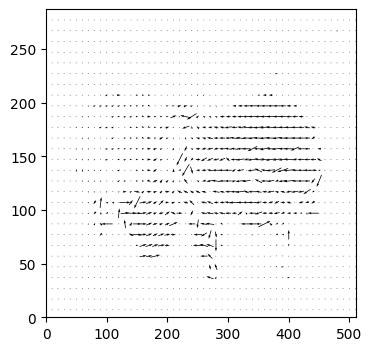

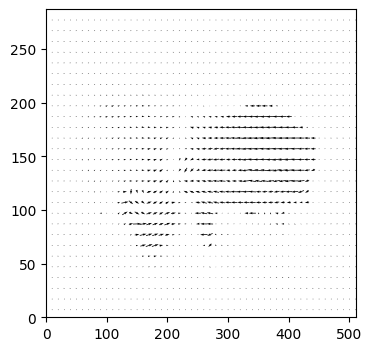

In [5]:
plotQuiver(motionMagnitude, motionDirection, 0.5, step)
plotQuiver(motionMagnitudeW, motionDirectionW, 0.5, step)